In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

## Real ROC Curve 
(i.e. cross_val_predict returning probabilities instead of predictions, and the threshold of probability for prediction of a class is changed to get the curve)

In [6]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/processed_results/'
pklname = rdrive + 'roc_nuc29_err10.pkl'
with open(pklname, 'rb') as pkl:
    results = pickle.load(pkl)

In [7]:
fpr_knn = results[0]
tpr_knn = results[1]
auc_knn = results[2]
fpr_dtr = results[3]
tpr_dtr = results[4]
auc_dtr = results[5]

In [10]:
rxtrs = ['bwr', 'phwr', 'pwr']
n_classes=3

In [37]:
#rxtrs = ['pwr', 'bwr', 'phwr']

y_bin = label_binarize(y, classes=rxtrs)
n_classes = 3
y_bin

In [11]:
def plot_roc(fpr, tpr, auc, alg):
    color = ['Brwn', 'Purp', 'Teal']
    for i, c in zip(range(n_classes), color):
        plt.plot(fpr[i], tpr[i], lw=2, color=colors['M'+c],
                 label='ROC, {0} (AUC = {1:0.2f})'.format(rxtrs[i], auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for {}'.format(alg))
    plt.legend(loc="lower right")
    plt.show()
    return

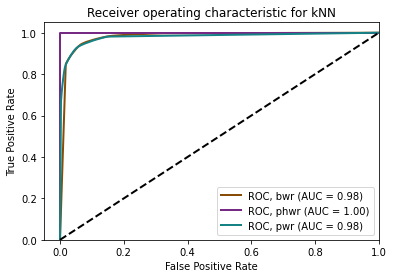

In [12]:
plot_roc(fpr_knn, tpr_knn, auc_knn, 'kNN')

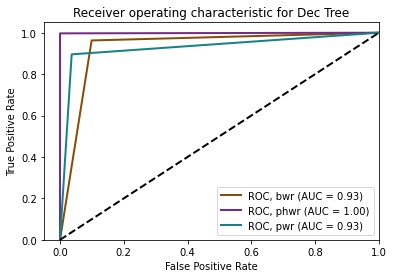

In [13]:
plot_roc(fpr_dtr, tpr_dtr, auc_dtr, 'Dec Tree')

In [21]:
#len(fpr_knn[2])
fpr_knn

{0: array([0.        , 0.01767701, 0.01767701, ..., 0.32113878, 0.32128759,
        1.        ]),
 1: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.70562771e-05,
        1.00000000e+00]),
 2: array([0.        , 0.00265731, 0.00265731, ..., 0.15020347, 0.15023992,
        1.        ])}